# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [52]:
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def my_len(list):
    count = 0
    for i in list:
        count+=1
    return count

def my_mean(list):
    meanish = 0
    for x in list:
        meanish += x
    return meanish/my_len(list)

def my_var(list):
    series = 0
    for x in list:
        series += (x -my_mean(list)) ** 2
    return series/(my_len(list))

def my_sdev(list):
    return pow(my_var(list),.5)

import statistics
import numpy as np

print('Length of x is: ', my_len(x), len(x))

print('Mean of x is: ', my_mean(x), statistics.mean(x))

print('Variance of x is: ', my_var(x), np.var(x))

print('Standard deviation of x is: ', my_sdev(x), np.std(x))
    

Length of x is:  7 7
Mean of x is:  3052.714285714286 3052.714285714286
Variance of x is:  183761.06122448976 183761.061224
Standard deviation of x is:  428.67360686714756 428.673606867


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [58]:
customers = [127, 80, 105, 92, 120, 115, 93]
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def my_cov(x,y):
    super_series = 0
    for a,b in zip(x,y):
#         print('a: ', a)
#         print('b: ', b)
        super_series += (a-my_mean(x))*(b-my_mean(y))*(1/(my_len(y)-1))
    return super_series #/ ((len(y)) **-1)

print(my_cov(customers, sales))





cov(customers, sales)[0,1]

# seems like my function works now



7604.357142857142


7604.3571428571422

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [60]:
def my_cor(x,y):
    return (my_cov(x,y) / (my_sdev(x)*my_sdev(y)))

my_cor(customers, sales)

1.123306307450706

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [82]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)
df = df.drop(columns='Unnamed: 0')
# df.columns
numeric = df.describe().columns.tolist()

ndf = df[numeric]
ndf.isna().sum()

pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1189
has_cabin_number       0
dtype: int64

In [84]:
# dropping body colum then other nans

ndf = ndf.drop(columns='body')
ndf = ndf.dropna()

KeyError: "['body'] not found in axis"

In [86]:
ndf.cov()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,0.702126,-0.127139,-3.974162,0.053400,0.013505,-24.227788,-0.250062
survived,-0.127139,0.236319,-0.305629,-0.014245,0.034690,6.146023,0.061387
age,-3.974162,-0.305629,165.385957,-2.550069,-1.451467,114.416613,1.470661
sibsp,0.053400,-0.014245,-2.550069,1.085692,0.336944,8.641768,-0.004036
parch,0.013505,0.034690,-1.451467,0.336944,0.749654,9.928031,0.013260
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,10.976961
has_cabin_number,-0.250062,0.061387,1.470661,-0.004036,0.013260,10.976961,0.174803


In [87]:
ndf.corr()

,pclass,survived,age,sibsp,parch,fare,has_cabin_number
pclass,1.000000,-0.312122,-0.368798,0.061162,0.018615,-0.558629,-0.713783
survived,-0.312122,1.000000,-0.048887,-0.028122,0.082418,0.244265,0.302031
age,-0.368798,-0.048887,1.000000,-0.190305,-0.130355,0.171892,0.273520
sibsp,0.061162,-0.028122,-0.190305,1.000000,0.373485,0.160238,-0.009264
parch,0.018615,0.082418,-0.130355,0.373485,1.000000,0.221539,0.036629
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,0.507253
has_cabin_number,-0.713783,0.302031,0.273520,-0.009264,0.036629,0.507253,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

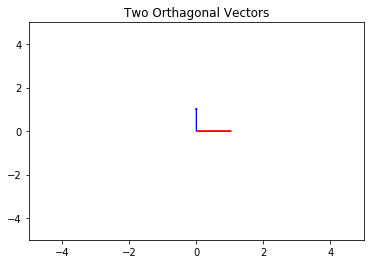

In [92]:
# dot product = 0

import matplotlib.pyplot as plt

v1 = [1, 0]

v2 = [0, 1]
# Plot it as a Vector arrow
ax = plt.axes()
ax.arrow(0,0, v1[0], v1[1], head_width=.05, head_length=0.05, color ='red');
ax.arrow(0,0, v2[0], v2[1], head_width=.05, head_length=0.05, color ='blue');

plt.title("Two Orthagonal Vectors");
ax.set_xlim(-5,5);
ax.set_ylim(-5,5);

plt.show();

In [94]:
np.dot(v1,v2)

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [93]:
a = [-5,3,7]
b = [6,-8,2]

np.dot(a,b)

# they are not orthagonal as their dot product is non zero

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [98]:
c = [2,-15,6,20]

np.linalg.norm(c) **2 , np.multiply(c,c) ,  np.multiply(np.transpose(c), c)

# they're all squaring c, but magnitude

(665.0, array([  4, 225,  36, 400]), array([  4, 225,  36, 400]))

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [102]:
d =[[7],[12]]
# np.linalg.norm(d) #.as_integer_ratio()

13.892443989449804

\begin{align}
d = \begin{bmatrix} 7 \\ 12\end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2\hat{i} + 3\hat{j}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8\end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{p}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [103]:
f = [4,12,11,9,2]
np.linalg.norm(f)

19.131126469708992

\begin{align} f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix} \end{align}

 \begin{align}
 \hat{f} = \frac{1}{||f||}f = \frac{1}{19.131126469708992}\begin{bmatrix} 4 \\ 12 \\  11 \\ 9 \\ 2 \end{bmatrix} = 
\begin{bmatrix} \frac{4}{19.131126469708992} \\ \frac{12}{19.131126469708992} \\  \frac{11}{19.131126469708992} \\  \frac{9}{19.131126469708992} \\  \frac{2}{19.131126469708992} \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

\begin{align}
g = \begin{bmatrix} 1 \\ 22\end{bmatrix} = 1\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 2\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2\hat{i} + 3\hat{j}
\end{align}

So hat{i} and hat{j} are the span because h will also equal these same unit vectors times the scalars 4 and 8.

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

$\mathbb{R}^3$ unit vectors: $\hat{i} = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$, $\hat{j} = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$,  $\hat{k} = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


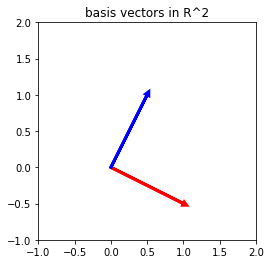

In [109]:
# Axis Bounds
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,-.5]
j_hat = [.5,1]

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()

In [110]:
np.dot(i_hat,j_hat)

0.0

## 6.2 What does it mean to form a basis?

The basis of a vector space is a set of linearly independent vectors that span the space. The span is the 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [1]:
from sympy import *
init_printing(use_unicode=True)

p = Matrix([[1, 2, 3],[-1,0,7],[4,8,2]])
p,p.rref()

⎛⎡1   2  3⎤  ⎛⎡1  0  0⎤           ⎞⎞
⎜⎢        ⎥  ⎜⎢       ⎥           ⎟⎟
⎜⎢-1  0  7⎥, ⎜⎢0  1  0⎥, (0, 1, 2)⎟⎟
⎜⎢        ⎥  ⎜⎢       ⎥           ⎟⎟
⎝⎣4   8  2⎦  ⎝⎣0  0  1⎦           ⎠⎠

Rank of P is 3

## 7.2 What does the rank of a matrix tell us?

The rank of a matrix is the number of dimensions of the vector space spanned by its columns, basically it's basis vectors. If a 3x3 matrix has 3 basis vectors, then it's rank is 3. But if it only has 2 linearly independent vectors then it's basis is 2.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

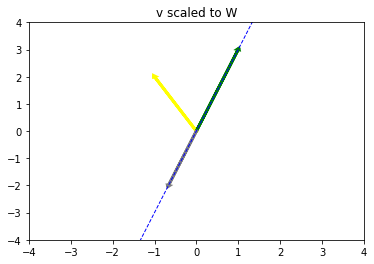

In [126]:
# Plot a line

# Axis Bounds
plt.xlim(-4,4)          
plt.ylim(-4,4)

# Original Vector
v = [1,3]


# Scaled Vectors
w = [-1,2]
proj = np.multiply(-(2/3),v)
# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')

plt.title("v scaled to W")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

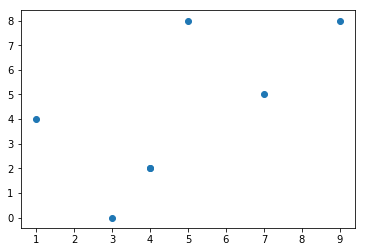

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
# plt(y=x)
plt.show()